In [ ]:
import numpy as np
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
import time

In [3]:
sns.set_theme(style="whitegrid")

# a - Exact Solution vs Truncated Fourier Series

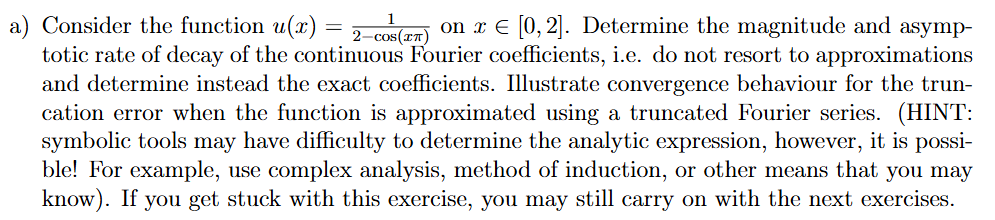

## Complex Coefficient Formula

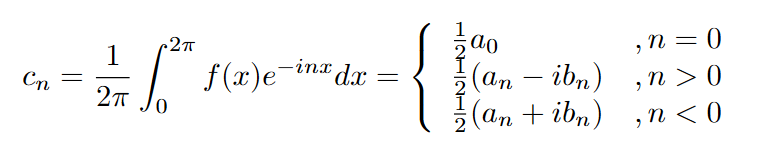

$$
u(x) = \frac{1}{2-\cos(πx)} \quad\quad x ∈ [0, 2]
$$

Known Solution

$$
C_n = \frac{1}{\sqrt{3}(2+\sqrt{3})^{|n|}}
$$

Solve this by the Residue Theorem

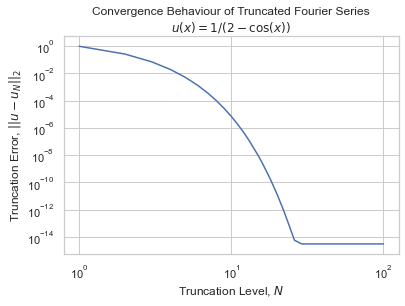

In [4]:
def C_n(n):
    quot = np.sqrt(3) * (2 + np.sqrt(3)) ** np.abs(n)
    return 1/quot

def u(x):
    return 1.0 / (2.0 - np.cos(x))


x = np.linspace(0, 2 * np.pi, 250)
y_exact = u(x)


# Ns = [10, 50, 100, 300, 1000, 3000, 10000]
Ns = [1, 3, 10, 30, 100, 300]
Ns = np.geomspace(1, 100, dtype=int)
errors = []

for N in Ns:
    y_trunc = np.zeros_like(x, dtype="complex")
    for n in range(-N, N + 1):
        y_trunc += C_n(n) * np.exp(1j * n * x)

    residual = y_exact - y_trunc
    errors.append(np.linalg.norm(residual))
    # y_trunc = np.real(y_trunc)
# plt.plot(x, y_trunc)
# plt.plot(x, y_exact)

plt.title("Convergence Behaviour of Truncated Fourier Series\n$u(x) = 1 / (2 - \\cos(x))$")
plt.xlabel("Truncation Level, $N$")
plt.ylabel("Truncation Error, $||u - u_N||_2$")
plt.loglog(Ns, errors)


# b - DFT

c:\Users\PernilleChristie\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\PernilleChristie\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


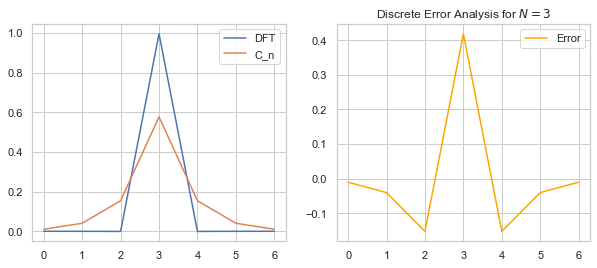

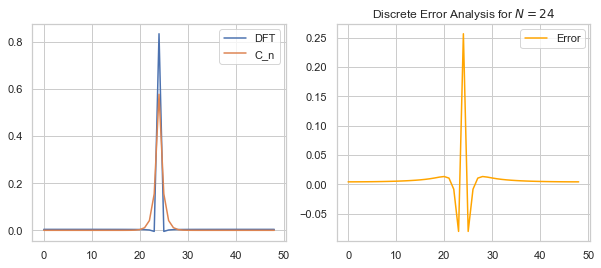

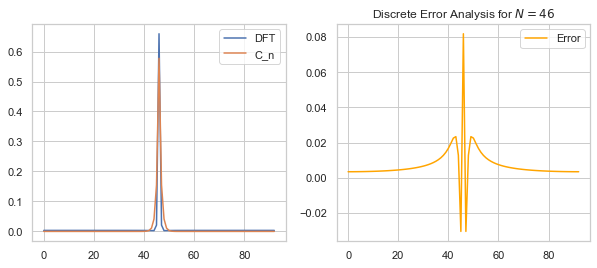

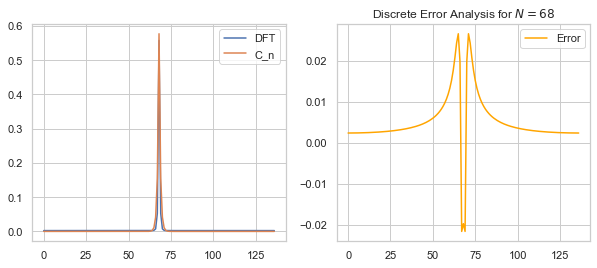

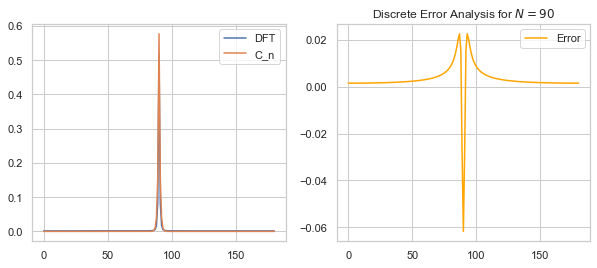

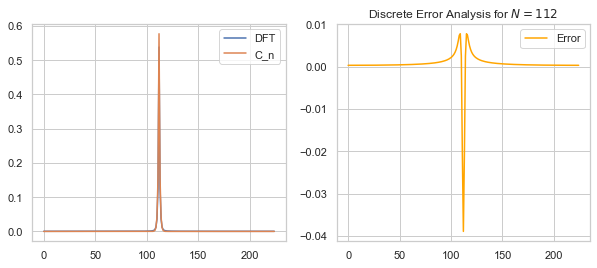

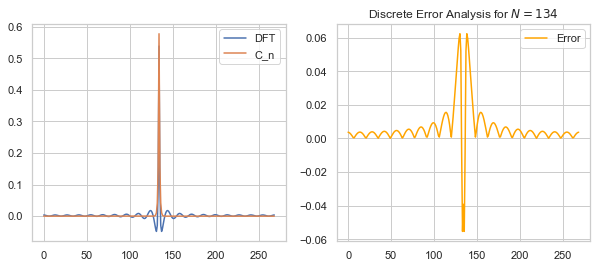

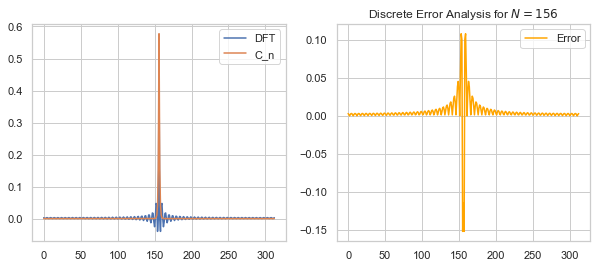

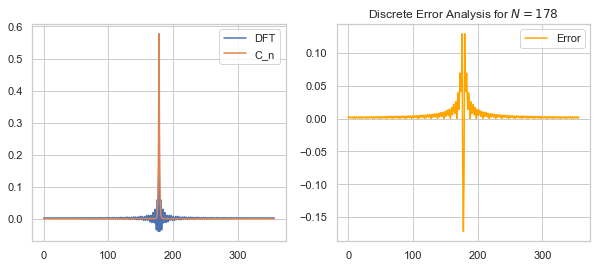

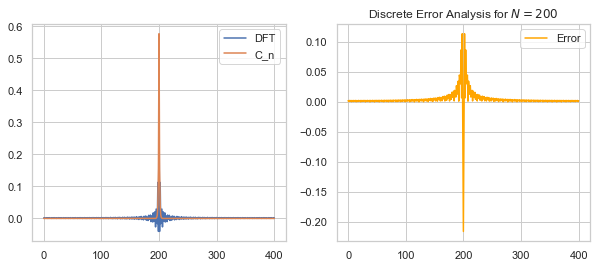

In [5]:
N = 25

Ns = np.linspace(3, 200, 10, dtype=int)

for N in Ns:
    dft_components = np.fft.fftshift(np.fft.fft(y_exact, n=2*N + 1, norm="forward"))
    Ns = np.arange(-N, N + 1)
    Cn_components = list(map(C_n, Ns))

    errors = np.abs(dft_components) - np.abs(Cn_components)

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 4))
    ax1.plot(dft_components, label="DFT")
    ax1.plot(list(map(C_n, np.arange(-N, N + 1))), label="C_n")
    ax1.legend()

    ax2.plot(errors, label="Error", color="orange")
    ax2.legend()

    plt.title(f"Discrete Error Analysis for $N={N}$")
    # ax2.legend()


# c - Nodal expansion

C:\Users\PernilleChristie\AppData\Local\Temp\ipykernel_11524\734872369.py:12: RuntimeWarning: invalid value encountered in divide
  hjs = 1/N * np.sin(N/2 * (x - xj)) * np.cos(1/2 * (x - xj)) / np.sin(1/2 * (x - xj))
C:\Users\PernilleChristie\AppData\Local\Temp\ipykernel_11524\734872369.py:29: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig2.show()


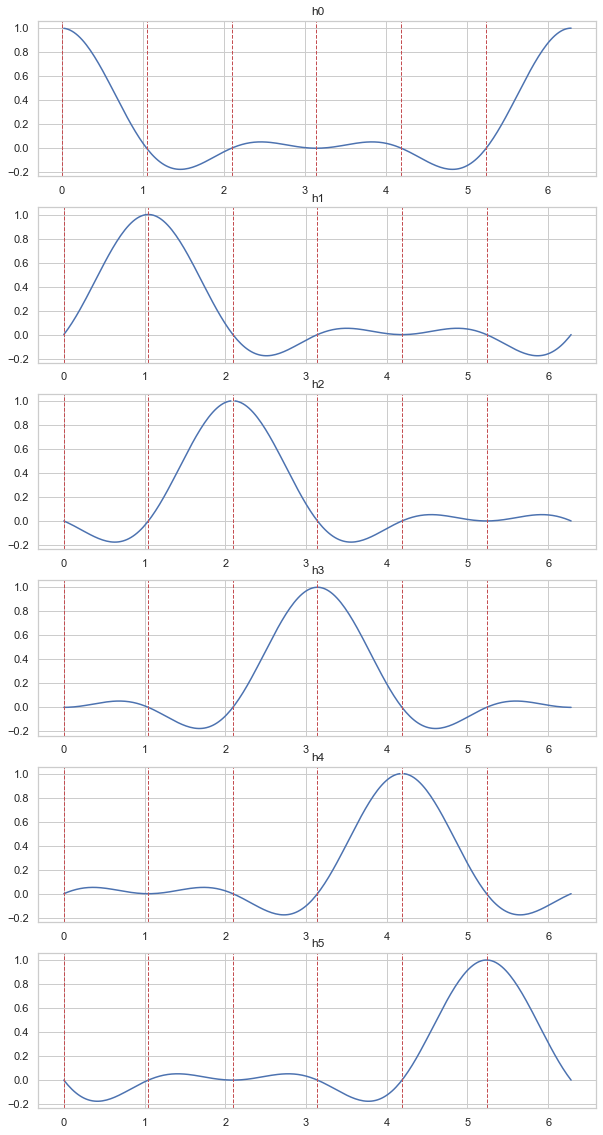

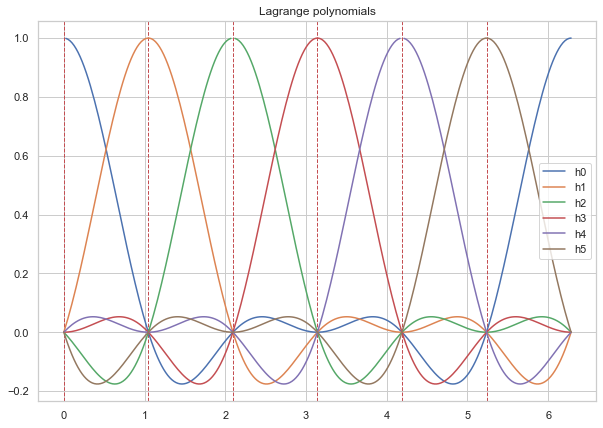

In [6]:
N = 6

fig, axs = plt.subplots(N, figsize = (10,20))

fig2, ax = plt.subplots(1, figsize = (10,7))

xjs = 2 * np.pi * np.arange(N) / N

for j in range(N):
    xj = xjs[j]

    hjs = 1/N * np.sin(N/2 * (x - xj)) * np.cos(1/2 * (x - xj)) / np.sin(1/2 * (x - xj))

    axs[j].plot(x, hjs, label=f'h{j}')

    for i in range(N):
        axs[j].axvline(x = xjs[i], color = 'r', ls = '--', lw = 1)

        if j == 0:
            ax.axvline(x = xjs[i], color = 'r', ls = '--', lw = 1)
    
    axs[j].set_title(f'h{j}')

    ax.plot(x, hjs, label=f'h{j}')


ax.legend()
ax.set_title("Lagrange polynomials")
fig2.show()

# d - Fourier differentiation

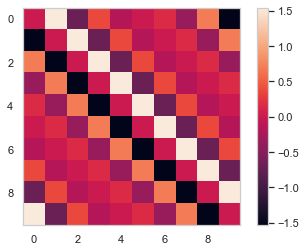

In [14]:
N = 10

def diff_mat(N):
    D = np.zeros((N, N))

    # The derivative function
    hj = lambda i, j : 1/2 * (-1)**(i - j) * np.cos(1/N * np.pi * (i - j)) \
                        / np.sin(1/N * np.pi * (i - j))

    # Insert in matrix
    for j in range(N):
        for i in range(N):
            if i != j:
                D[i, j] = hj(i, j)

    return D             

D = diff_mat(N)
plt.imshow(D)    
plt.colorbar()
plt.grid() # turn grid off
plt.show()

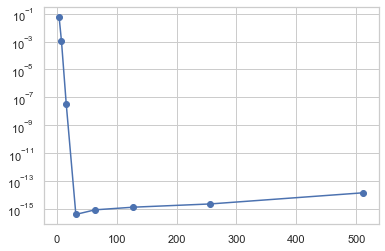

In [ ]:
v = lambda x : np.exp(np.sin(x))

vm = lambda x : np.exp(np.sin(x)) * np.cos(x)


Ns = # [4, 8, 16, 32, 64, 128, 256, 512]

errors = np.zeros_like(Ns, dtype=float)

for (i, N) in enumerate(Ns):
    xN = 2 * np.pi * np.arange(N) / N

    D = diff_mat(N)

    diffx = D @ v(xN)

    # errors[i] = np.linalg.norm(diffx - vm(xN), ord=np.inf)
    errors[i] = np.linalg.norm(diffx - vm(xN)) / N


plt.plot(Ns, errors, '-bo')
plt.gca().set_yscale('log')
plt.show()

# e - $L^2$-errors

In [9]:
# Defining functions
def w0(x):
    if (-2*np.pi <= x) and (x <= 0):
        return -np.cos(x)
    else:
        return np.cos(x)
    
def w1(x):
    if (-2*np.pi <= x) and (x <= 0):
        return -np.sin(x)
    else:
        return np.sin(x)
    
def w2(x):
    if (-2*np.pi <= x) and (x <= 0):
        return np.cos(x) + 1
    else:
        return -1 * (np.cos(x) + 1)
    

def w3(x):
    if (-2*np.pi <= x) and (x <= 0):
        return np.sin(x) + x - 2
    else:
        return -1 * (np.sin(x) + x - 2)


# f - Discrete differentiation comparison

In [10]:
Ns = [4, 8, 16, 32, 64, 128, 256, 512]

timings_FFT = np.zeros_like(Ns, dtype = float)
timings_mat = np.zeros_like(Ns, dtype = float)
errors_FFT = np.zeros_like(Ns, dtype = float)
errors_mat = np.zeros_like(Ns, dtype = float)

for (i, N) in enumerate(Ns):
    xN = 2 * np.pi * np.arange(N+1) / (N+1)

    vdiff_exact = vm(xN)
    v_exact = v(xN)

    # Timing FFT differentiation
    start = time.time()

    # TODO: Should we use scipy instead??
    diffx_FFT = np.fft.ifft(1j * np.fft.fftshift(np.arange(-N/2, N/2+1)) * np.fft.fft(v_exact, n=N + 1, norm="forward"), norm="forward")

    timings_FFT[i] = time.time() - start


    # Timing matrix differentiation
    start = time.time()
    
    D = diff_mat(N + 1)
    diffx_mat = np.dot(D, v_exact)

    timings_mat[i] = time.time() - start

    # Calculating errors
    errors_FFT[i] = np.linalg.norm(diffx_FFT - vdiff_exact)
    errors_mat[i] = np.linalg.norm(diffx_mat - vdiff_exact)
    

Text(0.5, 1.0, 'Timings')

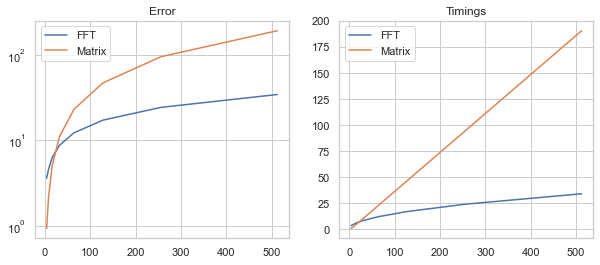

In [11]:
# Plotting
fig, axs = plt.subplots(1, 2, figsize=(10,4))
axs[0].plot(Ns, errors_FFT, label = "FFT")
axs[0].plot(Ns, errors_mat, label = "Matrix")
axs[0].set_yscale('log')
axs[0].legend()
axs[0].set_title("Error")

axs[1].plot(Ns, errors_FFT, label = "FFT")
axs[1].plot(Ns, errors_mat, label = "Matrix")
axs[1].legend()
axs[1].set_title("Timings")